# **Feature importance és feature selection**
Készítette: *Fogarassyné Vathy Ágnes*

## **1. Titanic adathalmaz általános előkészítése**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

**Block 1.1** Az adatok beolvasása:

In [2]:
# DataFrame létrehozása Excel fájlból
titanic = pd.read_excel('Titanic.xlsx')

titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


**Block 1.2** Általános adatelőkészítés:

In [3]:
# Name oszlop eldobása
titanic.drop(labels='Name', axis=1, inplace=True)

# A Sex oszlop dummy váltóvá konvertálása  (referencia kódolással)
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first=True)

titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,True,22.0,1,0,7.2500
1,1,1,False,38.0,1,0,71.2833
2,1,3,False,26.0,0,0,7.9250
3,1,1,False,35.0,1,0,53.1000
4,0,3,True,35.0,0,0,8.0500


**Block 1.3** Az osztályozási feladat előkészítése:



In [4]:
#osztálycímke és prediktív változók
classlabel = list(titanic.columns[:1])
features = list(titanic.columns[1:])

# DataFrame-et TULAJDONSÁGOK(features, X) és CÉL(target, y) tömbökre bontjuk
X = titanic.iloc[:, 1:].values
y = titanic.iloc[:, 0].values.reshape(-1,1)

# Tréning és teszt adatok létrehozása 2/3 és 1/3 vágással
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

# Input adatok skálázása a [0,1] tartományra
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **2. Feature importance**

### **2.1. Döntési fa osztályozó**

A döntési fa illesztését követően kinyerhetők az egyes tulajdonságok importance értékei az illesztett modell **[feature_importances_](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** attribútumából.

**Block 2.1** Egy döntési fa létrehozása és kiértékelése:



In [5]:
clf_dtree = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10)
clf_dtree = clf_dtree.fit(X_train,y_train)
print("Pontosság:",clf_dtree.score(X_test, y_test))

Pontosság: 0.8020477815699659


**Block 2.2** A **feature importance** értékek kiíratása:

In [6]:
clf_dtree.feature_importances_

array([0.10471164, 0.54111361, 0.1947072 , 0.05361729, 0.        ,
       0.10585024])

**Block 2.3** A **feature importance** értékek kiíratása táblázatosan a feature name-khez rendelve és az adatok vizualizálása:

In [7]:
imp = zip(features, clf_dtree.feature_importances_)
df_tree_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_tree_imp

,feature,importance
1,Sex,0.541114
2,Age,0.194707
5,Fare,0.105850
0,Pclass,0.104712
3,Siblings/Spouses Aboard,0.053617
4,Parents/Children Aboard,0.000000


<Axes: xlabel='importance', ylabel='feature'>

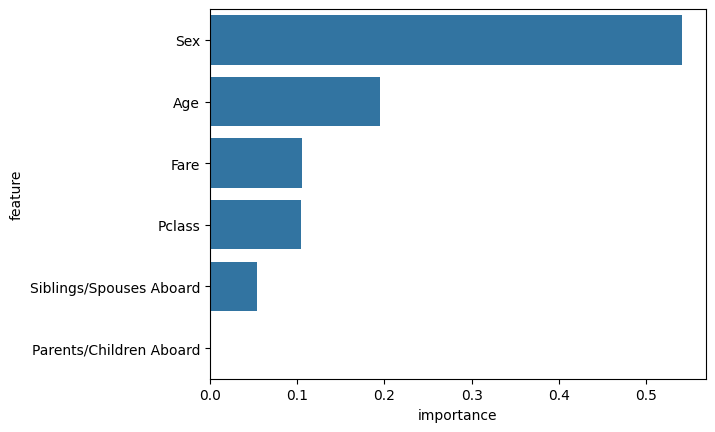

In [8]:
sns.barplot(data=df_tree_imp, y="feature", x="importance", orient="h")

In [9]:
fig = px.bar(df_tree_imp, x='feature', y='importance', color='importance', range_color=[0,1])
fig.show()

### **2.2 Random Forest**

Random Forest esetében a döntési fa osztályozóhoz analóg az illesztett modell **[feature_importances_](https://https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** attribútumából olvashatjuk ki az egyes tulajdonságok importance értékét.

**Block 2.4** Random Forest osztályozó létrehozása:

In [10]:
clf_rf = RandomForestClassifier(n_estimators=40, random_state=0, criterion="entropy",  max_depth=5)
clf_rf = clf_rf.fit(X_train, y_train.ravel())
print("Pontosság:",clf_rf.score(X_test, y_test))

Pontosság: 0.8054607508532423


**Block 2.5** **Feature importance** értékek kiíratása és ábrázolása:

In [11]:
clf_rf.feature_importances_

array([0.12170308, 0.41382065, 0.14109381, 0.06995327, 0.03430984,
       0.21911935])

In [12]:
imp = zip(features, clf_rf.feature_importances_)
df_rf_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_rf_imp

,feature,importance
1,Sex,0.413821
5,Fare,0.219119
2,Age,0.141094
0,Pclass,0.121703
3,Siblings/Spouses Aboard,0.069953
4,Parents/Children Aboard,0.034310


<Axes: xlabel='importance', ylabel='feature'>

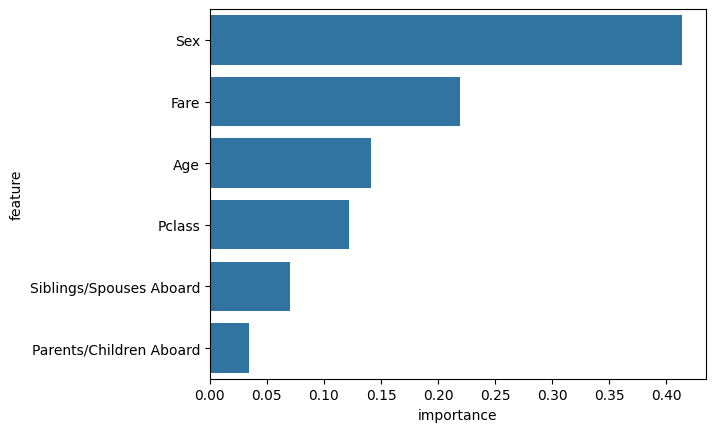

In [13]:
sns.barplot(data=df_rf_imp, y="feature", x="importance", orient="h")

In [14]:
fig = px.bar(df_rf_imp, x='feature', y='importance', color='importance', range_color=[0,1])
fig.show()

### **2.3 Logisztikus regresszió**

Logisztikus regresszió esetén az illesztett modell együtthatói adják meg az egyes imput változók befolyását az output változóra. Ezen értékeket a modell **[coef_](https://https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** attribútuma tartalmazza.

**Block 2.6** A logisztikus regressziós modell létrehozása, illesztése és kiértékelése:

In [15]:
clf_logreg = LogisticRegression(max_iter=300)
clf_logreg.fit(X_train, y_train.ravel())

print("A modell pontossága:", clf_logreg.score(X_test,y_test))

A modell pontossága: 0.7918088737201365


**Block 2.7** **Feature importance** értékek kiíratása és ábrázolása:

In [16]:
clf_logreg.coef_

array([[-1.12882590e+00, -2.69161750e+00, -3.96472866e-02,
        -3.45365273e-01, -6.19521956e-02,  2.18751192e-03]])

In [17]:
imp = zip(features, clf_logreg.coef_[0])
df_logreg_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=True)
df_logreg_imp

,feature,importance
1,Sex,-2.691618
0,Pclass,-1.128826
3,Siblings/Spouses Aboard,-0.345365
4,Parents/Children Aboard,-0.061952
2,Age,-0.039647
5,Fare,0.002188


<Axes: xlabel='importance', ylabel='feature'>

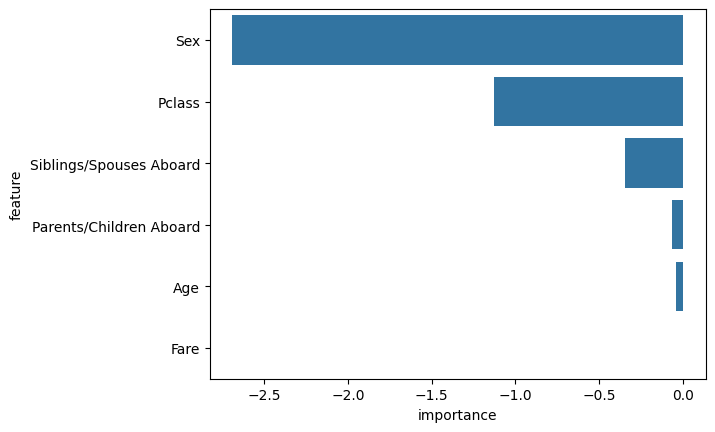

In [18]:
sns.barplot(data=df_logreg_imp, y="feature", x="importance", orient="h")

In [19]:
fig = px.bar(df_logreg_imp, x='feature', y='importance', color='importance')
fig.show()

> Értelmezzük az értékeket!

> Hasonlítsuk össze az eddigi értékekkel!

## **3. Permutation Feature Importance**

A **[Permutation Feature Importance](https://scikit-learn.org/stable/modules/permutation_importance.html)** egy általános módszer, amely lehetővé teszi az egyes változók fontosságának mérését. Számítható akár teljes adathalmazon is, vagy a független teszt halmazon. Most az összehasonlítás végett mi mégis a tréning adatokon számoljuk...

### __3.1. MLPClassifier__

A neurális hálóról gyakran mondjuk, hogy egy fekete doboz. Az egyes tulajdonságok fontosságának meghatározása viszont történhet esetében is például a Permuatation Feature Importance metódussal.

**Block 3.1** Hozzunk létre egy neurális hálózatot, majd értékeljük ki!

In [20]:
clf_nn = MLPClassifier(
                    hidden_layer_sizes=(4,4),
                    activation='relu',
                    solver='lbfgs',
                    max_iter=1000,
                    alpha=0.001,
                    random_state=0)

clf_nn.fit(X_train, y_train.ravel())

print("A modell pontossága:", clf_nn.score(X_test,y_test))

A modell pontossága: 0.8156996587030717


**Block 3.2** **Feature importance** értékek kiíratása a **Permutation Importance** segítségével:

In [21]:
imp_nn = permutation_importance(clf_nn, X_train, y_train, scoring='accuracy', n_repeats=10)
imp_nn

{'importances_mean': array([-0.0020202 ,  0.20942761,  0.05925926,  0.02272727,  0.00976431,
         0.00420875]),
 'importances_std': array([0.00596635, 0.01059938, 0.01158562, 0.00765021, 0.00547073,
        0.00919784]),
 'importances': array([[ 0.003367  , -0.003367  , -0.00673401, -0.00673401, -0.01178451,
          0.00841751, -0.00673401,  0.00505051, -0.0016835 ,  0.        ],
        [ 0.21043771,  0.2037037 ,  0.20707071,  0.21043771,  0.18350168,
          0.21212121,  0.20538721,  0.22222222,  0.21717172,  0.22222222],
        [ 0.06902357,  0.04882155,  0.07407407,  0.07239057,  0.07070707,
          0.03703704,  0.06060606,  0.05387205,  0.05555556,  0.05050505],
        [ 0.02020202,  0.02525253,  0.03367003,  0.02861953,  0.03030303,
          0.01515152,  0.02525253,  0.01178451,  0.02693603,  0.01010101],
        [ 0.00841751,  0.00841751,  0.01010101,  0.01346801,  0.01346801,
          0.01178451,  0.00841751, -0.0016835 ,  0.02020202,  0.00505051],
        [ 0.008

**Block 3.3** **Feature importance** értékek ábrázolása:

In [22]:
imp = zip(features, imp_nn.importances_mean)
df_nn_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_nn_imp

,feature,importance
1,Sex,0.209428
2,Age,0.059259
3,Siblings/Spouses Aboard,0.022727
4,Parents/Children Aboard,0.009764
5,Fare,0.004209
0,Pclass,-0.002020


<Axes: xlabel='importance', ylabel='feature'>

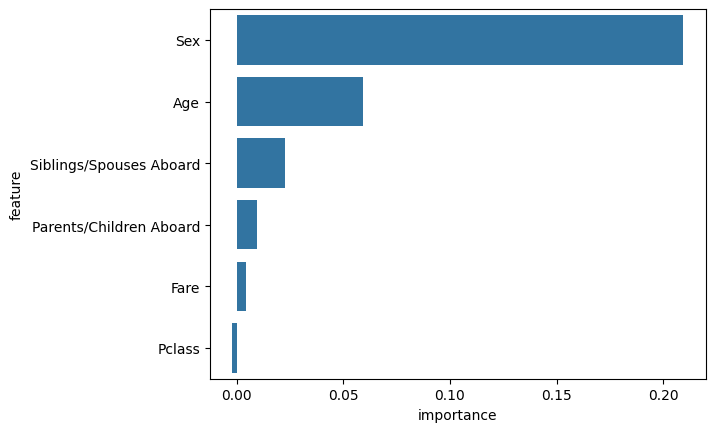

In [23]:
sns.barplot(data=df_nn_imp, y="feature", x="importance", orient="h")

In [24]:
fig = px.bar(df_nn_imp, x='feature', y='importance', color='importance', range_color=[0,1])
fig.show()

> Hasonlítsuk össze az értékeket az eddigi eredményekkel!

### __3.2. k-nn osztályozó__

A Permutation Feature Importance természetesen bármelyik osztályozó esetén alkalmazható. Így például a k-nn osztályozó esetén is.

**Block 3.4** Az osztályozó létrehozása és kiértékelése:

In [25]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train.ravel())

print("A modell pontossága:", clf_knn.score(X_test_scaled,y_test))

A modell pontossága: 0.8191126279863481


**Block 3.5** A **feature importance** értékek számítása és ábrázolása:

In [26]:
imp_knn = permutation_importance(clf_knn, X_train_scaled, y_train, scoring='accuracy', n_repeats=10)

imp = zip(features, imp_knn.importances_mean)
df_knn_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_knn_imp

,feature,importance
1,Sex,0.205556
0,Pclass,0.109259
2,Age,0.093266
5,Fare,0.044613
3,Siblings/Spouses Aboard,0.044613
4,Parents/Children Aboard,0.011616


<Axes: xlabel='importance', ylabel='feature'>

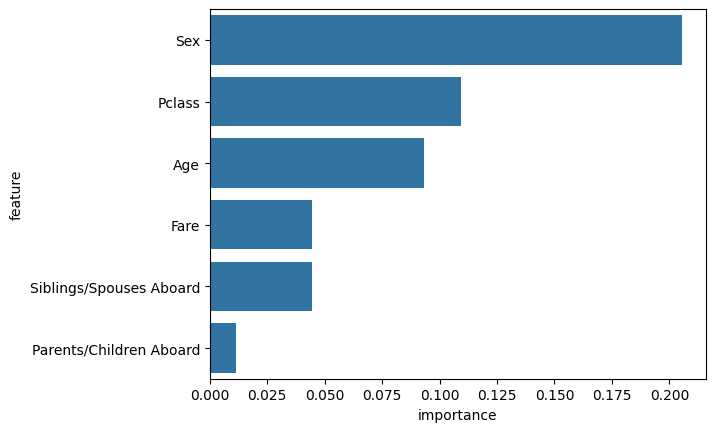

In [27]:
sns.barplot(data=df_knn_imp, y="feature", x="importance", orient="h")

In [28]:
fig = px.bar(df_knn_imp, x='feature', y='importance', color='importance', range_color=[0,1])
fig.show()

### __3.3. Random Forest - Permutation Importance-szal__

**Block 3.6** A Random Forest osztályozót korábban már létrehoztuk. Az pontossága és az embedded módszerrel számított feature importance ábrázolása:

In [29]:
print("Pontosság:",clf_rf.score(X_test, y_test))
df_rf_imp

Pontosság: 0.8054607508532423


,feature,importance
1,Sex,0.413821
5,Fare,0.219119
2,Age,0.141094
0,Pclass,0.121703
3,Siblings/Spouses Aboard,0.069953
4,Parents/Children Aboard,0.034310


<Axes: xlabel='importance', ylabel='feature'>

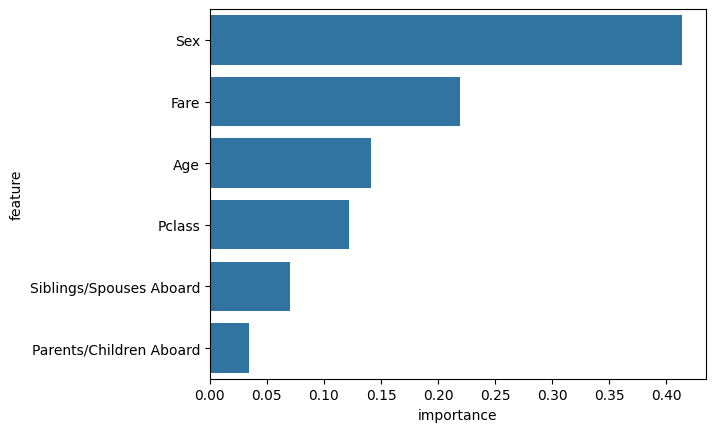

In [30]:
sns.barplot(data=df_rf_imp, y="feature", x="importance", orient="h")

**Block 3.7** A **Permutation Importance**-szal számított feature importance értékek:

In [31]:
imp_rf2 = permutation_importance(clf_rf, X_train, y_train, scoring='accuracy', n_repeats=10)

imp = zip(features, imp_rf2.importances_mean)
df_rf_imp2 = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_rf_imp2

,feature,importance
1,Sex,0.253872
2,Age,0.053367
3,Siblings/Spouses Aboard,0.031818
0,Pclass,0.024411
5,Fare,0.023906
4,Parents/Children Aboard,0.008081


<Axes: xlabel='importance', ylabel='feature'>

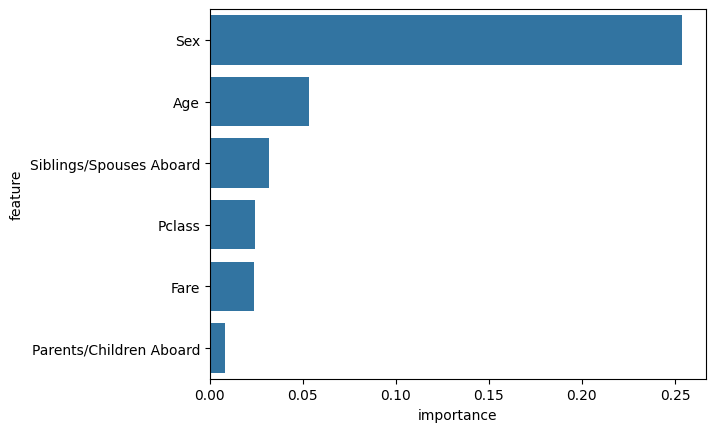

In [32]:
sns.barplot(data=df_rf_imp2, y="feature", x="importance", orient="h")

> Hasonlítsuk össze az eredményeket! Mi lehet a különbség oka?

> Megoldás [itt](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html).


## **4. Feature selection**

### **4.1 Sequential Forward/Backward Selection**

Mielőtt megvalósítanánk a kiválasztást, nézzük meg a feature importance értékeket...

**Block 4.1** **Hagyományos módszerrel mérve a feature importance-okat (ismétlés):**
- Logisztikus regresszió illesztése és a feature importance kinyerése:

In [33]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train.ravel())

print("A modell pontossága:", clf_logreg.score(X_test,y_test))

imp = zip(features, clf_lr.coef_[0])
df_lr_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=True)
df_lr_imp

A modell pontossága: 0.7918088737201365


,feature,importance
1,Sex,-2.691618
0,Pclass,-1.128826
3,Siblings/Spouses Aboard,-0.345365
4,Parents/Children Aboard,-0.061952
2,Age,-0.039647
5,Fare,0.002188


> Ne feledjük, hogy ez csak egy *train_test_split* eredménye!!!!

- A feauture importance értékek vizualizálása:

<Axes: xlabel='importance', ylabel='feature'>

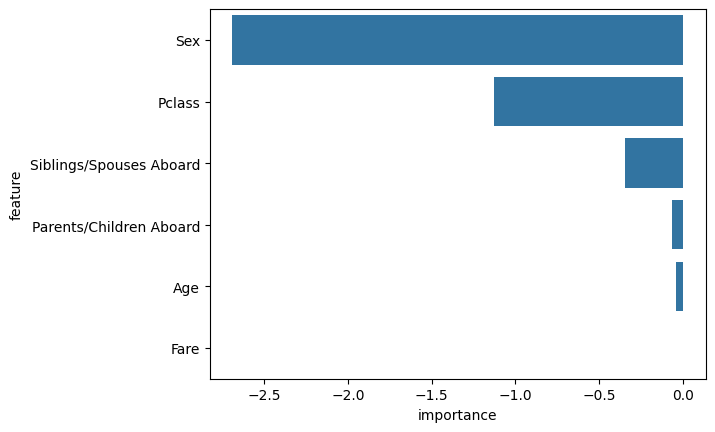

In [34]:
sns.barplot(data=df_lr_imp, y="feature", x="importance", orient="h")

**Block 4.2** **Wrapper módszerrel (az mlxtent csomag használatával)**


A szekvenciális tulajdonságkiválasztást most az **mlxtent** csomag [SequantialFeatureSelector](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#sequentialfeatureselector) osztályával valósítjuk meg. Az osztály haszmálatával lehetőségünk van előrefelé, vagy visszafelé történő tulajdonságkiválasztást is megvalósítani, illetve lebegő/nem lebegő módszert is választhatunk az implementálás során.

*Fontosabb paraméterek:*
- *estimator*: a kiválasztáshoz alkalmazandó osztályozó/regressziós modell
- *k_features*: a kiválasztandó tulajdonságok száma; ha értéke *'best'*, akkor a keresztvalidálás során legjobb értéket adó tulajdonságokkal tér vissza
- *foreward*: True esetén előrelépéses, False esetén hátralépések kiválasztás
- *scoring*: a monitorozandó metrika
- *cv*: keresztvalidációk száma

*Fontosabb attribútumok:*
- *k_features_idx_*: a kiválasztott tulajdonságok indexei
- *k_features_names_*: a kiválasztott tulajdonságok nevei
- *k_score_*: a keresztvalidáció átlagos score értéke

- Előrelépéses kiválasztással:

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(clf_lr,
          k_features = 'best',
          forward = True,
          floating = False,
          scoring = 'accuracy',
          cv = 10,  # keresztvalidáció
          n_jobs = -1)
sfs = sfs.fit(X_train, y_train)

print('Sequential forward selection (%i features): ' % np.size(sfs.k_feature_idx_)) # a kiválasztott tulajdonságok száma
print('A választott tulajdosnágok indexe: ', sfs.k_feature_idx_)
print('CV score: ', sfs.k_score_)

/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y 

Sequential forward selection (3 features): 
A választott tulajdosnágok indexe:  (0, 1, 3)
CV score:  0.7978248587570621


/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y 

- Visszalépéses eliminálással:

In [36]:
sfs2 = SFS(clf_lr,
          k_features = 'best',
          forward = False,
          floating = False,
          scoring = 'accuracy',
          cv = 10,  # keresztvalidáció
          n_jobs = -1)
sfs2 = sfs2.fit(X_train, y_train.ravel())

print('Sequential forward selection (%i features): ' % np.size(sfs2.k_feature_idx_)) # a kiválasztott tulajdonságok száma
print('A választott tulajdosnágok indexe: ', sfs2.k_feature_idx_)
print('CV score: ', sfs2.k_score_)

/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Sequential forward selection (4 features): 
A választott tulajdosnágok indexe:  (0, 1, 2, 5)
CV score:  0.8013841807909605


**Block 4.2** **Wrapper módszerrel (a scikit learn csomag használatával)**

A kiválasztást megvalósíthatjuk a **scikit learn** csomag használatával is, de ez jelen verziójában nem tud floating módszert alkalmazni, illetve a megállási kritérium is kissé másabb. Az osztály, amit meg kell hívnunk, itt is a [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) nevet kapta.

*Fontosabb paraméterek:*
- *estimator*: a kiválasztáshoz alkalmazandó osztályozó/regressziós modell
- *n_features_to_select*: a kiválasztandó tulajdonságok száma (alapértelmezettként a tulajdonságok fele); ha értéke *'auto'*, akkor a a megállás a *tol* paraméter értékétől függ
- *tol*: leáll a kiválasztás, ha a modell pontossága nem tud legalább a *tol* paraméter értékével nőni
- *direction*: *'forward'*, vagy *'backward'*
- *scoring*: a monitorozandó metrika
- *cv*: keresztvalidációk száma

*Fontosabb attribútumok:*
- *n_features_in_*: a kiválasztás során vizsgált tulajdonságok száma
- *features_names_in_*: a kiválasztás során vizsgált tulajdonságok száma
- *n_features_to_select_*: a kiválasztott tulajdonságok száma

- előrelépéses kiválasztással:

In [37]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(clf_lr,
          n_features_to_select = 'auto',
          tol = 0.01,
          direction = 'forward',
          scoring = 'accuracy',
          cv = 10,  # keresztvalidáció
          n_jobs = -1)
sfs = sfs.fit(X_train, y_train)

print('A kiválasztott tulajdonságok száma: ', sfs.n_features_to_select_)

A kiválasztott tulajdonságok száma:  1


/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y 

> Mint látjuk ezzel azért nehezebb hangolni :(((